In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [15]:
global_filepath = "global-data-on-sustainable-energy (1).csv"
global_data = pd.read_csv(global_filepath)
global_data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [16]:
global_data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [17]:
X = global_data.copy()
y = X.pop("Renewable-electricity-generating-capacity-per-capita")

cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
print(cols_with_missing)
print(global_data.isnull().sum())

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US 

In [18]:
global_data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [19]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

features = [
    "Entity",
    "Year",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Value_co2_emissions_kt_by_country",
    "gdp_growth",
    "gdp_per_capita",
]

X = X[features]

my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(X))
imputed_X.columns = X.columns

X["y_missing"] = y.isnull().astype(int)
y.fillna(-1, inplace=True)

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(imputed_X, y)

In [20]:
print(mi_scores)

Entity                                                              2.109972
Primary energy consumption per capita (kWh/person)                  0.977644
Access to clean fuels for cooking                                   0.849774
Electricity from renewables (TWh)                                   0.730601
Low-carbon electricity (% electricity)                              0.666055
Renewable energy share in the total final energy consumption (%)    0.627646
gdp_per_capita                                                      0.601375
Value_co2_emissions_kt_by_country                                   0.569031
Access to electricity (% of population)                             0.534769
Electricity from fossil fuels (TWh)                                 0.515628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.232393
Electricity from nuclear (TWh)                                      0.216477
gdp_growth                                                          0.125476

<Axes: xlabel='Renewable energy share in the total final energy consumption (%)', ylabel='Renewable-electricity-generating-capacity-per-capita'>

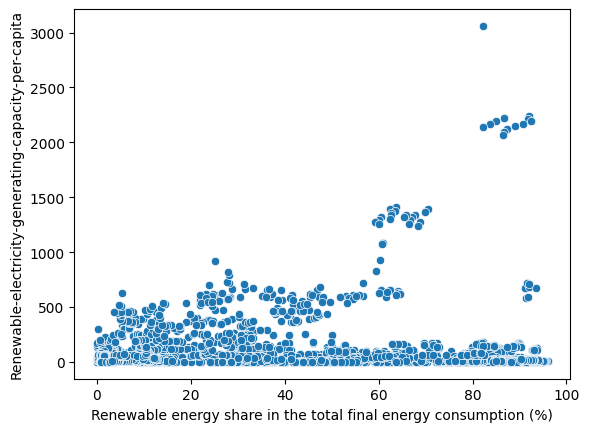

In [21]:
sns.scatterplot(x="Renewable energy share in the total final energy consumption (%)", y="Renewable-electricity-generating-capacity-per-capita", data=global_data)

In [22]:
global_data["Mean energy share (%)"] = global_data.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].transform('mean')
global_data["Mean energy share (%)"] = global_data["Entity"].map(global_data.groupby("Entity")["Mean energy share (%)"].first())

unique_countries = global_data.drop_duplicates(subset="Entity")

print(unique_countries[['Entity', 'Mean energy share (%)']].head(10))
# print(global_data.select_dtypes(["object"]).nunique())

                  Entity  Mean energy share (%)
0            Afghanistan                25.6805
21               Albania                    NaN
42               Algeria                 0.2870
63                Angola                57.6970
84   Antigua and Barbuda                 0.2005
105            Argentina                 9.5605
126              Armenia                 8.5530
147                Aruba                 3.4845
168            Australia                 8.2665
189              Austria                30.1080


In [23]:
kmeans = KMeans(n_clusters = 6)
imputed_X["Cluster"] = kmeans.fit_predict(imputed_X)
imputed_X["Cluster"] = imputed_X["Cluster"].astype("category")

pca = PCA(n_components=3)
X_pca = pca.fit_transform(imputed_X)

imputed_X["PCA1"] = X_pca[:, 0]
imputed_X["PCA2"] = X_pca[:, 1]
imputed_X["PCA3"] = X_pca[:, 2]

c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


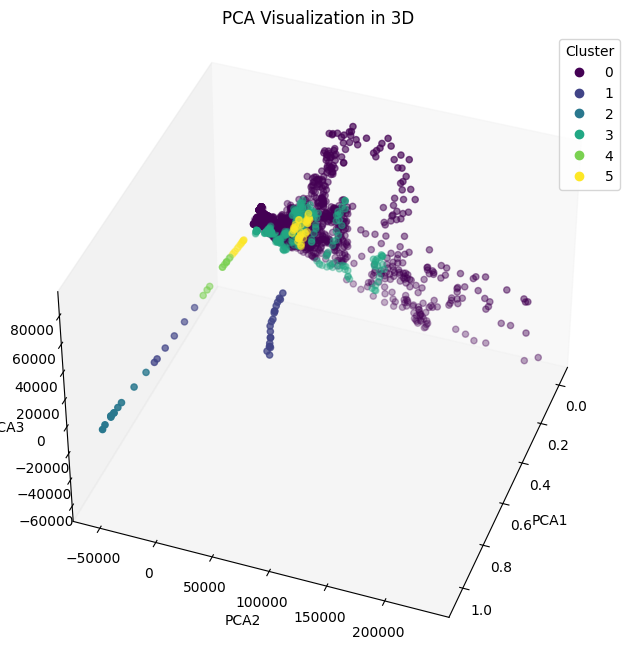

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot with PCA1, PCA2, and PCA3 on the axes
scatter = ax.scatter(imputed_X["PCA1"], imputed_X["PCA2"], imputed_X["PCA3"], c=imputed_X["Cluster"], cmap='viridis')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('PCA Visualization in 3D')
ax.grid(False)
ax.legend(*scatter.legend_elements(), title='Cluster')
ax.view_init(elev=40, azim=20)

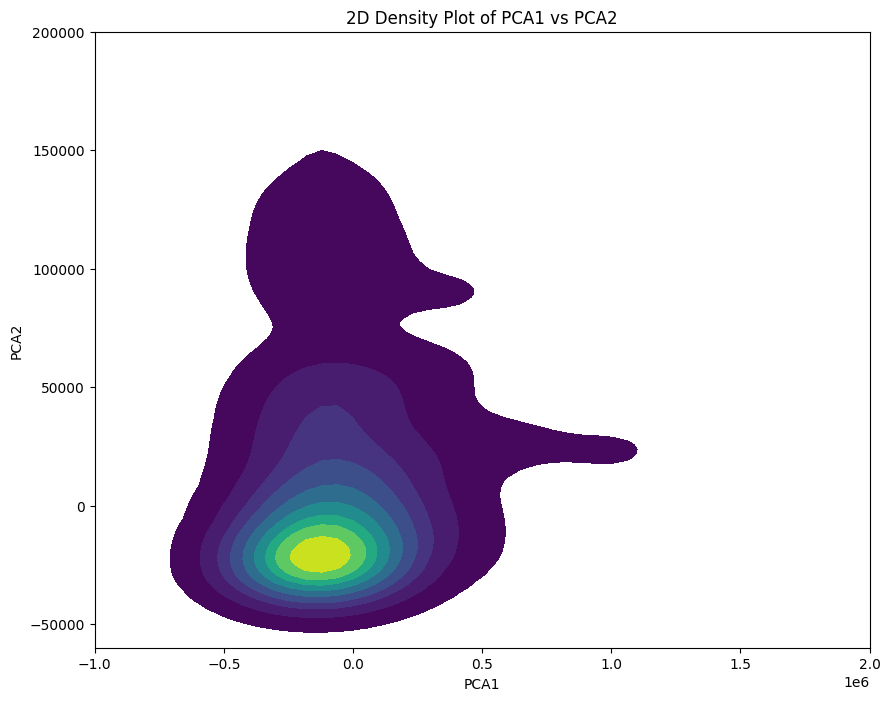

In [31]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=imputed_X, x="PCA1", y="PCA2", fill=True, cmap="viridis")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D Density Plot of PCA1 vs PCA2')
plt.xlim(-1000000, 2000000)
plt.ylim(-60000, 200000)
plt.show()